<a href="https://colab.research.google.com/github/cristinarainich/Child-Mind-Institute-Project/blob/main/Pheno_data_finalquery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Updated** 17/10/2024 17:00

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import math
import pylab as pl
import seaborn as sns
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
sns.set()

In [4]:
working_path = Path('/content/drive/MyDrive/KKNV')

In [5]:
cd /content/drive/MyDrive/KKNV

/content/drive/MyDrive/KKNV


In [6]:
!ls /content/drive/MyDrive/KKNV

 11a5490b-0e2d-4fd7-b54e-e2ebd0a72df6.zip   Pilot.csv
 comorbidity				   'Pilot reading task.gsheet'
 data					    protocols
 data26.02.2024.csv			    Query1.csv
 data_filtered_done.csv			   'Query 1.Dot values.csv'
'files sharing.docx'			    Query2.csv
 ids.csv				   'Query 2.Dot values.csv'
 iq_overview.csv			    Query_final.csv
 iq_overview.gsheet			    query_September2024.csv
'JC 1.10 AF.pptx'			    sites.csv
 old					    tasks
 Pheno.csv				    Temporal_Frequency_Staircase_V3_gamified_L2R_Ilia.eve
 pheno_mri.csv


## Pipeline to make the data convinient to use

Here we are going to use the full and the most recent dataset.

In [7]:
# our dataset
data = pd.read_csv(
    working_path.joinpath('query_September2024.csv'),
    index_col=None,
    low_memory=False
)

In [8]:
data.shape

(6687, 791)

In [9]:
ids = data.Identifiers.values
new_ids = []
for i in ids:
  new_i = i.replace(',assessment', '')
  new_ids.append(new_i)
print(len(ids))
print(len(new_ids))

data['Identifiers'] = new_ids

6687
6687


In [10]:
data = data.drop(labels=0, axis=0)

In [11]:
data.head()

,Identifiers,"Barratt,Barratt_P1_Edu","Barratt,Barratt_P1_Occ","Barratt,Barratt_P2_Edu","Barratt,Barratt_P2_Occ","Barratt,Barratt_Total","Barratt,Barratt_Total_Edu","Barratt,Barratt_Total_Occ","Barratt,financialsupport","Basic_Demos,Age",...,"WISC_Remote,WISC_VCI_Sum","WISC_Remote,WISC_VP_Raw","WISC_Remote,WISC_VP_Scaled","WISC_Remote,WISC_Vocab_Raw","WISC_Remote,WISC_Vocab_Scaled","WISC_Remote,WISC_WMI","WISC_Remote,WISC_WMI_Percentile","WISC_Remote,WISC_WMI_Sum","WISC_Remote,WISC_complete","WISC_Remote,WISC_incomplete_reason"
1,NDARAA075AMK,21,30,21,45,58.5,21,37.5,3,6.72804,...,.,.,.,.,.,.,.,.,.,.
2,NDARAA112DMH,18,30,12,15,37.5,15,22.5,3,5.545744,...,.,.,.,.,.,.,.,.,.,.
3,NDARAA117NEJ,12,5,3,5,12.5,7.5,5,3,7.475929,...,.,.,.,.,.,.,.,.,.,.
4,NDARAA306NT2,21,15,15,15,33,18,15,3,21.216746,...,.,.,.,.,.,.,.,.,.,.
5,NDARAA504CRN,21,40,NaN,NaN,61,21,40,1,9.165297,...,.,.,.,.,.,.,.,.,.,.


The Identifiers at the end of the table contain additional visits of some of the subjects. We need to incorporate this information to the original data entries. The snap of the code below is an example of this occuring in the data.

In [12]:
data['Identifiers'].values[6000:6200]

array(['NDARPX155RF3_Visit_2', 'NDARPX155RF3_Visit_3',
       'NDARPX219TW0_Visit_1', 'NDARPX219TW0_Visit_2',
       'NDARPX219TW0_Visit_3', 'NDARPZ621ZLE_Visit_3',
       'NDARRA717GYV_Visit_1', 'NDARRA717GYV_Visit_2',
       'NDARRA733VWX_Visit_1', 'NDARRA733VWX_Visit_2',
       'NDARRA733VWX_Visit_3', 'NDARRA733VWX_Visit_4',
       'NDARRB942UWU_Visit_1', 'NDARRB942UWU_Visit_2',
       'NDARRB942UWU_Visit_3', 'NDARRC190NKB_Visit_1',
       'NDARRC190NKB_Visit_2', 'NDARRC190NKB_Visit_3',
       'NDARRC819NLC_Visit_1', 'NDARRC819NLC_Visit_2',
       'NDARRC819NLC_Visit_3', 'NDARRD326KB9_Visit_1',
       'NDARRD326KB9_Visit_2', 'NDARRD326KB9_Visit_3',
       'NDARRD720XZK_Visit_1', 'NDARRD720XZK_Visit_2',
       'NDARRD720XZK_Visit_3', 'NDARRF897HB5_Visit_1',
       'NDARRF897HB5_Visit_2', 'NDARRF897HB5_Visit_3',
       'NDARRG199RU4_Visit_2', 'NDARRG199RU4_Visit_3',
       'NDARRG415BJM_Visit_1', 'NDARRG415BJM_Visit_2',
       'NDARRG415BJM_Visit_3', 'NDARRH407MEY_Visit_1',
       'ND

In [13]:
versions = []
for i in data.Identifiers.values.tolist():
  if '_' in i:
    versions.append(i)
print(len(versions))

1819


In [14]:
columns = data.columns
i = 0
for id in versions:
  values = data[data['Identifiers'] == id].values.tolist()
  while len(values) == 1:
    values = values[0]
  for value in values[1:]:
    if value != '.':
      if type(value) == str:
        column_number = values.index(value)
        row_number = data[data['Identifiers'] == id[:12]].index[0]
        data.at[row_number, columns[column_number]] = value
      elif type(value) != str and math.isnan(value) is not True:
        column_number = values.index(value)
        row_number = data[data['Identifiers'] == id[:12]].index[0]
        data.at[row_number, columns[column_number]] = value
      else:
        if math.isnan(value) is not True:
          print(value, type(value))
  i += 1
print(i)

1819


In [15]:
for id in versions:
  data = data[data['Identifiers'] != id]
data.shape

(4867, 791)

In [16]:
# checking for duplicates
num_col_duplicates = data['Identifiers'].duplicated().sum()
print(f'Number of duplicates in column "Identifiers": {num_col_duplicates}')

Number of duplicates in column "Identifiers": 0


In [17]:
# we also have a column Basic Demos, EID that contain identifiers. Let's cross reference to check whether there are any discrepancies
ids1 = data['Identifiers'].values
ids2 = data['Basic_Demos,EID'].values
print(len(ids1))
print(len(ids2))
for i in range(0, len(ids1)):
  if ids1[i] != ids2[i]:
    print(ids1, ids2)
    break

4867
4867


In [18]:
data.columns

Index(['Identifiers', 'Barratt,Barratt_P1_Edu', 'Barratt,Barratt_P1_Occ',
       'Barratt,Barratt_P2_Edu', 'Barratt,Barratt_P2_Occ',
       'Barratt,Barratt_Total', 'Barratt,Barratt_Total_Edu',
       'Barratt,Barratt_Total_Occ', 'Barratt,financialsupport',
       'Basic_Demos,Age',
       ...
       'WISC_Remote,WISC_VCI_Sum', 'WISC_Remote,WISC_VP_Raw',
       'WISC_Remote,WISC_VP_Scaled', 'WISC_Remote,WISC_Vocab_Raw',
       'WISC_Remote,WISC_Vocab_Scaled', 'WISC_Remote,WISC_WMI',
       'WISC_Remote,WISC_WMI_Percentile', 'WISC_Remote,WISC_WMI_Sum',
       'WISC_Remote,WISC_complete', 'WISC_Remote,WISC_incomplete_reason'],
      dtype='object', length=791)

Let's now work on individual columns to make them more convinient for screening

In [19]:
# we have a column "Participant Status" that contains information on whether
# a person dropped out or been lost to follow up
status = data['Basic_Demos,Participant_Status'].unique()
for each in status:
  number = data[data['Basic_Demos,Participant_Status'] == each].shape[0]
  print('Number of ' + each + ': ' + str(number))

Number of Complete: 4241
Number of Lost to follow-up: 269
Number of Dropout: 357


In [20]:
#working on Basic_Demos columns
data['Basic_Demos,Age'] = data['Basic_Demos,Age'].astype(float)
data['Basic_Demos,Sex'] = data['Basic_Demos,Sex'].astype(int)
data.drop(['Basic_Demos,Site'], axis=1, inplace = True) # contain only nan values
data['Basic_Demos,Study_Site'] = data['Basic_Demos,Study_Site'].astype(int)

In [21]:
# Barrat score
number = data[data['Barratt,Barratt_Total'] == '.'].shape[0]
print('Missing values for Barrat scores: ' + str(number) + ' out of ' + str(data.shape[0]))

Missing values for Barrat scores: 434 out of 4867


In [22]:
# CELF tests
# if we end up using it, it might make sense to check the validity first in CELF_Valid
data['CELF,CELF_Total'] = data['CELF,CELF_Total'].fillna('.')
number = data[data['CELF,CELF_Total'] == '.'].shape[0]
print('Missing values for CELF scores: ' + str(number) + ' out of ' + str(data.shape[0]))

Missing values for CELF scores: 662 out of 4867


In [23]:
# CTOPP-2
# don't trust the 'complete' field, the ones with number 2 are both who completed some sets and who did nothing
data['CTOPP,CTOPP_Complete'] = data['CTOPP,CTOPP_Complete'].fillna('.')
number = data[data['CTOPP,CTOPP_Complete'] != '1'].shape[0]
print('Missing values for CTOPP-2 scores: ' + str(number) + ' out of ' + str(data.shape[0]))

names = ['CTOPP,CTOPP_BW_D', 'CTOPP,CTOPP_BW_P',
       'CTOPP,CTOPP_BW_R', 'CTOPP,CTOPP_BW_S',
       'CTOPP,CTOPP_EL_D', 'CTOPP,CTOPP_EL_P', 'CTOPP,CTOPP_EL_R',
       'CTOPP,CTOPP_EL_S', 'CTOPP,CTOPP_NR_D', 'CTOPP,CTOPP_NR_P',
       'CTOPP,CTOPP_NR_R', 'CTOPP,CTOPP_NR_S', 'CTOPP,CTOPP_RD_D',
       'CTOPP,CTOPP_RD_P', 'CTOPP,CTOPP_RD_R', 'CTOPP,CTOPP_RD_S',
       'CTOPP,CTOPP_RL_D', 'CTOPP,CTOPP_RL_P', 'CTOPP,CTOPP_RL_R',
       'CTOPP,CTOPP_RL_S', 'CTOPP,CTOPP_RO_D', 'CTOPP,CTOPP_RO_P',
       'CTOPP,CTOPP_RO_R', 'CTOPP,CTOPP_RO_S', 'CTOPP,CTOPP_RSN_Comp',
       'CTOPP,CTOPP_RSN_D', 'CTOPP,CTOPP_RSN_P', 'CTOPP,CTOPP_RSN_Sum']

for name in names:
  data[name] = data[name].fillna('.') # filling nan values if any

ctopp = []
ids = data.Identifiers.values.tolist()
for id in ids:
  subset = data[data['Identifiers'] == id]
  tests = []
  for name in names:
    if subset[name].values[0] != '.':
      tests.append(name)
  if len(tests) == 28:
    ctopp.append('full')
  elif len(tests) == 0:
    ctopp.append('missing')
  else:
    new_tests = ''
    for each in tests:
      new_tests = new_tests + each[12:] + ', '
    ctopp.append(new_tests)
data['CTOPP'] = ctopp

Missing values for CTOPP-2 scores: 805 out of 4867


In [24]:
# DailyMeds
# we have people who have taken medication, drugs, or alcohol

print('Drugs: ', data['DailyMeds,drugs'].unique()) # value '.' and 2 contains only nan values and '.'
#data[data['DailyMeds,drugs'] == '1'][['DailyMeds,drugs_01', 'DailyMeds,drugs_02']] # to check the drugs

print('Alcohol: ', data['DailyMeds,alcohol'].unique()) # value '.' and 2 contains only nan values and '.'
#data[data['DailyMeds,alcohol'] == '1'][['DailyMeds,alc_01', 'DailyMeds,alc_02']] # to check alcohol (only one person)

print('Meds: ', data['DailyMeds,medications'].unique()) # DO NOT TRUST THE SCORES, only look at the names and doses

data['DailyMeds,med_name_01'] = data['DailyMeds,med_name_01'].fillna('.') # have ' ', nan, and '.' values
data['DailyMeds,med_name_02'] = data['DailyMeds,med_name_02'].fillna('.') # have '.' and nan values
data['DailyMeds,med_name_03'] = data['DailyMeds,med_name_03'].fillna('.') # have '.' and nan values

meds1 = data['DailyMeds,med_name_01'].values.tolist() # have ' ' and '.' values
meds2 = data['DailyMeds,med_name_02'].values.tolist() # have '.' values
meds3 = data['DailyMeds,med_name_03'].values.tolist() # have '.' values
medications = []
for i in range(0, data.shape[0]):
  status = 0
  if meds1[i] != '.':
    if meds1[i] != ' ':
      status += 1
    elif meds1[i] == ' ':
      status = 0
  elif meds1[i] == '.':
    if meds2[i] != '.':
      status += 1
    elif meds2[i] == '.':
      if meds3[i] != '.':
        status += 1
  if status != 0:
    medications.append(1)
  else:
    medications.append(0)

data['DailyMeds,medications'] = medications # created a new coding depending on whether there are any entries in drug names

Drugs:  ['2' '.' '0' '1']
Alcohol:  ['2' '.' '0' '1']
Meds:  ['1' '.' '0']


In [25]:
# Diagnosis_ClinicianConsensus
# getting rid of nan values everywhere
names = ['ByHx', 'Cat', 'Code', 'Confirmed', 'New', 'PRem', 'Past_Doc', 'Presum', 'RC', 'Rem', 'RuleOut', 'Spec', 'Sub', 'Time']
data['Diagnosis_ClinicianConsensus,NoDX'] = data['Diagnosis_ClinicianConsensus,NoDX'].fillna('.')
for number in range(1, 11):
  if number != 10:
    column = 'Diagnosis_ClinicianConsensus,DX_0' + str(number)
  else:
    column = 'Diagnosis_ClinicianConsensus,DX_10'
  data[column] = data[column].fillna('.') # here we deal with only main column names
  for name in names:
    column_add = column + '_' + name
    data[column_add] = data[column_add].fillna('.')

We need to identify who is control and who is dyslexic and who has nothing to do with these categories. Control participants have the status of 'No Diagnosis Given' in the DX_01 and in the NoDX (the indicator 1). We need to push together the diagnoses from all of the 10 columns, consider the degree of certainty for these diagnosis and whether it is a confirmed status or not, and then create the column with values stating what group a particular participant is attributed to. As a result, I would like to have a status column saying that it is a drop out, control, just dyslexic, dyslexic with comorbidities or orther disorder. And then I would like to have a separate column that would include all the list of diagnoses for people who are not drop outs and controls.

We have the following variabilities in the diagnosis of SLI: ['Specific Learning Disorder with Impairment in Reading',
 'Specific Learning Disorder with Impairment in Mathematics',
 'Specific Learning Disorder with Impairment in Written Expression',
 'Specific Learning Disorder with Impairment in Reading ',
 'Specific Learning Disorder with Impairment in Mathematics ']. In the code we will account for this, as we would like to have the specific type of DD known.

In [245]:
check1 = data[(data['Diagnosis_ClinicianConsensus,DX_01'] == 'Specific Learning Disorder with Impairment in Reading') &
     (data['Diagnosis_ClinicianConsensus,DX_02'] == 'Specific Learning Disorder with Impairment in Written Expression')][['Identifiers']].values

In [246]:
check2 = data[(data['Diagnosis_ClinicianConsensus,DX_03'] == 'Specific Learning Disorder with Impairment in Reading') &
     (data['Diagnosis_ClinicianConsensus,DX_02'] == 'Specific Learning Disorder with Impairment in Written Expression')][['Identifiers']].values

In [247]:
check3 = data[(data['Diagnosis_ClinicianConsensus,DX_02'] == 'Specific Learning Disorder with Impairment in Reading') &
     (data['Diagnosis_ClinicianConsensus,DX_03'] == 'Specific Learning Disorder with Impairment in Written Expression')][['Identifiers']].values

In [248]:
check4 = data[(data['Diagnosis_ClinicianConsensus,DX_01'] == 'Specific Learning Disorder with Impairment in Reading') &
     (data['Diagnosis_ClinicianConsensus,DX_03'] == 'Specific Learning Disorder with Impairment in Written Expression')][['Identifiers']].values

In [249]:
check5 = data[(data['Diagnosis_ClinicianConsensus,DX_01'] == 'Specific Learning Disorder with Impairment in Reading') &
     (data['Diagnosis_ClinicianConsensus,DX_04'] == 'Specific Learning Disorder with Impairment in Written Expression')][['Identifiers']].values

In [250]:
check6 = data[(data['Diagnosis_ClinicianConsensus,DX_02'] == 'Specific Learning Disorder with Impairment in Reading') &
     (data['Diagnosis_ClinicianConsensus,DX_04'] == 'Specific Learning Disorder with Impairment in Written Expression')][['Identifiers']].values

In [251]:
check7 = data[(data['Diagnosis_ClinicianConsensus,DX_03'] == 'Specific Learning Disorder with Impairment in Reading') &
     (data['Diagnosis_ClinicianConsensus,DX_04'] == 'Specific Learning Disorder with Impairment in Written Expression')][['Identifiers']].values

In [252]:
check8 = data[(data['Diagnosis_ClinicianConsensus,DX_04'] == 'Specific Learning Disorder with Impairment in Reading') &
     (data['Diagnosis_ClinicianConsensus,DX_05'] == 'Specific Learning Disorder with Impairment in Written Expression')][['Identifiers']].values

In [253]:
check_writtentwice = data[(data['Diagnosis_ClinicianConsensus,DX_07'] == 'Specific Learning Disorder with Impairment in Written Expression') &
     (data['Diagnosis_ClinicianConsensus,DX_05'] == 'Specific Learning Disorder with Impairment in Written Expression')][['Identifiers']].values

In [254]:
check9 = data[(data['Diagnosis_ClinicianConsensus,DX_03'] == 'Specific Learning Disorder with Impairment in Reading') &
     (data['Diagnosis_ClinicianConsensus,DX_05'] == 'Specific Learning Disorder with Impairment in Written Expression')][['Identifiers']].values

In [255]:
check10 = data[(data['Diagnosis_ClinicianConsensus,DX_02'] == 'Specific Learning Disorder with Impairment in Reading') &
     (data['Diagnosis_ClinicianConsensus,DX_05'] == 'Specific Learning Disorder with Impairment in Written Expression')][['Identifiers']].values

In [256]:
check11 = data[(data['Diagnosis_ClinicianConsensus,DX_01'] == 'Specific Learning Disorder with Impairment in Reading') &
     (data['Diagnosis_ClinicianConsensus,DX_05'] == 'Specific Learning Disorder with Impairment in Written Expression')][['Identifiers']].values

In [257]:
check12 = data[(data['Diagnosis_ClinicianConsensus,DX_01'] == 'Specific Learning Disorder with Impairment in Reading') &
     (data['Diagnosis_ClinicianConsensus,DX_06'] == 'Specific Learning Disorder with Impairment in Written Expression')][['Identifiers']].values

In [258]:
check13 = data[(data['Diagnosis_ClinicianConsensus,DX_02'] == 'Specific Learning Disorder with Impairment in Reading') &
     (data['Diagnosis_ClinicianConsensus,DX_06'] == 'Specific Learning Disorder with Impairment in Written Expression')][['Identifiers']].values

In [259]:
check14 = data[(data['Diagnosis_ClinicianConsensus,DX_03'] == 'Specific Learning Disorder with Impairment in Reading') &
     (data['Diagnosis_ClinicianConsensus,DX_06'] == 'Specific Learning Disorder with Impairment in Written Expression')][['Identifiers']].values

In [260]:
check15 = data[(data['Diagnosis_ClinicianConsensus,DX_04'] == 'Specific Learning Disorder with Impairment in Reading') &
     (data['Diagnosis_ClinicianConsensus,DX_06'] == 'Specific Learning Disorder with Impairment in Written Expression')][['Identifiers']].values

In [261]:
check16 = data[(data['Diagnosis_ClinicianConsensus,DX_05'] == 'Specific Learning Disorder with Impairment in Reading') &
     (data['Diagnosis_ClinicianConsensus,DX_06'] == 'Specific Learning Disorder with Impairment in Written Expression')][['Identifiers']].values

In [262]:
check17 = data[(data['Diagnosis_ClinicianConsensus,DX_07'] == 'Specific Learning Disorder with Impairment in Reading') &
     (data['Diagnosis_ClinicianConsensus,DX_06'] == 'Specific Learning Disorder with Impairment in Written Expression')][['Identifiers']].values

In [263]:
check18 = data[(data['Diagnosis_ClinicianConsensus,DX_06'] == 'Specific Learning Disorder with Impairment in Reading') &
     (data['Diagnosis_ClinicianConsensus,DX_07'] == 'Specific Learning Disorder with Impairment in Written Expression')][['Identifiers']].values

In [264]:
check19 = data[(data['Diagnosis_ClinicianConsensus,DX_03'] == 'Specific Learning Disorder with Impairment in Reading') &
     (data['Diagnosis_ClinicianConsensus,DX_07'] == 'Specific Learning Disorder with Impairment in Written Expression')][['Identifiers']].values

In [265]:
check20 = data[(data['Diagnosis_ClinicianConsensus,DX_02'] == 'Specific Learning Disorder with Impairment in Reading') &
     (data['Diagnosis_ClinicianConsensus,DX_07'] == 'Specific Learning Disorder with Impairment in Written Expression')][['Identifiers']].values

In [266]:
check21 = data[(data['Diagnosis_ClinicianConsensus,DX_01'] == 'Specific Learning Disorder with Impairment in Reading') &
     (data['Diagnosis_ClinicianConsensus,DX_07'] == 'Specific Learning Disorder with Impairment in Written Expression')][['Identifiers']].values

In [267]:
check22 = data[(data['Diagnosis_ClinicianConsensus,DX_04'] == 'Specific Learning Disorder with Impairment in Reading') &
     (data['Diagnosis_ClinicianConsensus,DX_08'] == 'Specific Learning Disorder with Impairment in Written Expression')][['Identifiers']].values

In [268]:
check23 = data[(data['Diagnosis_ClinicianConsensus,DX_06'] == 'Specific Learning Disorder with Impairment in Reading') &
     (data['Diagnosis_ClinicianConsensus,DX_08'] == 'Specific Learning Disorder with Impairment in Written Expression')][['Identifiers']].values

In [269]:
check24 = data[(data['Diagnosis_ClinicianConsensus,DX_07'] == 'Specific Learning Disorder with Impairment in Reading') &
     (data['Diagnosis_ClinicianConsensus,DX_08'] == 'Specific Learning Disorder with Impairment in Written Expression')][['Identifiers']].values

In [270]:
check25 = data[(data['Diagnosis_ClinicianConsensus,DX_07'] == 'Specific Learning Disorder with Impairment in Reading') &
     (data['Diagnosis_ClinicianConsensus,DX_09'] == 'Specific Learning Disorder with Impairment in Written Expression')][['Identifiers']].values

In [271]:
check26 = data[(data['Diagnosis_ClinicianConsensus,DX_01'] == 'Specific Learning Disorder with Impairment in Reading') &
     (data['Diagnosis_ClinicianConsensus,DX_09'] == 'Specific Learning Disorder with Impairment in Written Expression')][['Identifiers']].values

In [272]:
check27 = data[(data['Diagnosis_ClinicianConsensus,DX_09'] == 'Specific Learning Disorder with Impairment in Reading') &
     (data['Diagnosis_ClinicianConsensus,DX_10'] == 'Specific Learning Disorder with Impairment in Written Expression')][['Identifiers']].values

In [122]:
 # Diagnosis_ClinicianConsensus
def diagnosis(df):
  df['Diagnosis_ClinicianConsensus,NoDX'] = df['Diagnosis_ClinicianConsensus,NoDX'].fillna('.')

  status = [] # will contain information on whether it is control, dropout, DD with/without comorbidities, other
  all_diagnoses = [] # will contain all the diagnoses
  type_DD = [] # will contain the type of DD
  DD_certainty = [] # will contain the info on whether the diagnosis is confirmed
  adhd = [] # will contain the infor whether there is an adhd diagnosis
  intel_disability = [] # intellectual disability or autism

  for i in range(0, data.shape[0]): # going through all the data
    #print('New Subject')
    subset = df.iloc[i] # a particular raw will all the values
    #print(subset[['Diagnosis_ClinicianConsensus,DX_01', 'Diagnosis_ClinicianConsensus,DX_02', 'Diagnosis_ClinicianConsensus,DX_03',
    #              'Diagnosis_ClinicianConsensus,DX_04', 'Diagnosis_ClinicianConsensus,DX_05', 'Diagnosis_ClinicianConsensus,DX_06',
    #              'Diagnosis_ClinicianConsensus,DX_07', 'Diagnosis_ClinicianConsensus,DX_08', 'Diagnosis_ClinicianConsensus,DX_09',
    #              'Diagnosis_ClinicianConsensus,DX_10']])
    noDX = subset['Diagnosis_ClinicianConsensus,NoDX'] # 3 - drop out; 1 - control; 2, ' ', '.' - some diagnosis
    if noDX == '3': # drop out
      status.append('Dropout')
      all_diagnoses.append('N/A')
      type_DD.append('N/A')
      adhd.append('N/A')
      intel_disability.append('N/A')
      DD_certainty.append('N/A')
    elif noDX == '1': # No Diagnosis Given
      status.append('Control')
      all_diagnoses.append('N/A')
      type_DD.append('N/A')
      DD_certainty.append('N/A')
      adhd.append('N/A')
      intel_disability.append('N/A')
    else: # when noDX = 2, '.', or ' ' it has a diagnosis
      # here we are going to consider all the columns that contain the name of diagnosis
      dys = 0
      dys_type = ''
      inter_diag = ''
      index = 0
      inter_certainty = ''
      certainty_index = 0
      adhd_index = 0 #adhd index
      disability_index = 0
      for number in range(1, 11): # we are going one by one through all the diagnosis columns
        if number != 10:
          name_diag = 'Diagnosis_ClinicianConsensus,DX_0' + str(number)
          name_conf = 'Diagnosis_ClinicianConsensus,DX_0' + str(number) + '_Confirmed'
          name_presum = 'Diagnosis_ClinicianConsensus,DX_0' + str(number) + '_Presum'
          name_rc = 'Diagnosis_ClinicianConsensus,DX_0' + str(number) + '_RC'
          name_ruleout = 'Diagnosis_ClinicianConsensus,DX_0' + str(number) + '_RuleOut'
        elif number == 10:
          name_diag = 'Diagnosis_ClinicianConsensus,DX_10'
          name_conf = 'Diagnosis_ClinicianConsensus,DX_10' + '_Confirmed'
          name_presum = 'Diagnosis_ClinicianConsensus,DX_10' + '_Presum'
          name_rc = 'Diagnosis_ClinicianConsensus,DX_10' + '_RC'
          name_ruleout = 'Diagnosis_ClinicianConsensus,DX_10' + '_RuleOut'

        diagnosis = subset[name_diag]
        conf = subset[name_conf]
        presum = subset[name_presum]
        rc = subset[name_rc]
        ruleout = subset[name_ruleout]

        if 'No Diagnosis' in diagnosis: # when something is off and no diagnosis detected outside of the noDX values 1 and 3
            print('ERROR: No Diagnosis detected')
            print('The raw: ', i, ' ', name_diag, diagnosis)
            break
          # now we should cover all the cases with the type of diagnosis
        elif diagnosis == '.':
            index += 1
        elif diagnosis == ' ':
            index += 1
        else:
          if 'Specific Learning Disorder with' in diagnosis:
              dys += 1
              dys_type = dys_type + diagnosis + '; '
              # here we need to understand the certainty of the DD diagnosis
              if conf == '1':
                certainty_index += 1
                inter_certainty = inter_certainty + 'Confirmed, '
              if presum == '1':
                certainty_index += 1
                inter_certainty = inter_certainty + 'Presumptive, '
              if rc == '1':
                certainty_index += 1
                inter_certainty = inter_certainty + 'RConfirm, '
              if ruleout == '1':
                certainty_index += 1
                inter_certainty = inter_certainty + 'Ruleout, '
              if certainty_index != 1:
                inter_certainty = inter_certainty + 'Unclear, '
                break
          else:
            inter_diag = inter_diag + diagnosis + '; '
            if 'Attention-Deficit' in diagnosis:
              adhd_index += 1
            elif 'ADHD' in diagnosis:
              adhd_index += 1
            if 'Intellectual Disability' in diagnosis:
              disability_index += 1
            if 'Autism' in diagnosis:
              disability_index += 1


      #print('Inter_diag', inter_diag) # indicates all the diagnoses except for SLI
      #print('Dys_type', dys_type) # type of SLI
      #print(dys) # how many SLIs
      #print(index) # how many ' ' or '.' values for this subject

      # we need to differentiate between no diagnosis if none is given byt they're not reported control
      # dyslexic without comorbidities
      # dyslexic with comorbidities
      # other diagnosis
      counter = 0
      if dys == 0:
        if dys_type == '':
          if inter_diag != '':
            status.append('Other diagnosis')
            all_diagnoses.append(inter_diag)
            type_DD.append('N/A')
            DD_certainty.append('N/A')
          else:
            status.append('All dots')
            all_diagnoses.append('N/A')
            type_DD.append('N/A')
            DD_certainty.append('N/A')
        else:
          print('ERROR: dys = 0 but dys type not')
          print(i, subset, dys_type, dys)
          break

      elif dys != 0: # if there is a DD diagnosis
        if inter_diag == '':
          status.append('DD')
          all_diagnoses.append(dys_type)
          DD_certainty.append(inter_certainty)
        elif inter_diag != '':
          status.append('DD with comorbidities')
          new_inter_diag = dys_type + inter_diag
          all_diagnoses.append(new_inter_diag)
          DD_certainty.append(inter_certainty)
        if dys == 1:
          if 'Written' in dys_type:
            type_DD.append('Writing')
          elif 'Reading' in dys_type:
            type_DD.append('Reading')
          elif 'Mathematics' in dys_type:
            type_DD.append('Math')
          else:
            print('ERROR: unknown type of DD')
            print(i, dys_type, inter_diag, dys)
            break
        elif dys == 2:
          if 'Mathematics' and 'Reading' in dys_type:
            type_DD.append('Reading and Math')
          elif 'Mathematics' and 'Written' in dys_type:
            type_DD.append('Math and Writing')
          elif 'Written' and 'Reading' in dys_type:
            type_DD.append('Reading and Writing')
            counter += 1

          else:
            print('ERROR: unknown type of DD')
            print(i, dys_type, inter_diag, dys)
            break
        elif dys == 3:
          if 'Mathematics' and 'Reading' and 'Written' in dys_type:
            type_DD.append('Reading, Writing, and Math')
          elif subset['Identifiers'] == 'NDARDV222JZ6': # for one subject there are accidently two diagnoses for SLI with impairment in math
            type_DD.append('Reading and Math')
          elif subset['Identifiers'] == 'NDARGX583YNZ': # accidently two reading diagnoses
            type_DD.append('Reading and Math')
          else:
            print('ERROR: unknown type of DD')
            print(i, dys_type, inter_diag, dys)
            print(subset)
            break
        else:
          print('ERROR: more than 3 dys types')
          print(i, dys_type, inter_diag, dys)
          print(subset)
          break
      if adhd_index == 0:
        adhd.append(0)
      else:
        adhd.append(adhd_index)
      if disability_index == 0:
        intel_disability.append(0)
      else:
        intel_disability.append(disability_index)



    #print('ALL DONE')
    #print(len(status))
    #print(status)
    #print(len(all_diagnoses))
    #print(all_diagnoses)
  return status, all_diagnoses, type_DD, DD_certainty, adhd, intel_disability, counter

In [27]:
 status, all_diagnoses, type_DD, DD_certainty, adhd, intel_disability = diagnosis(data)
 data['Group'] = status
 data['Diagnosis'] = all_diagnoses
 data['DD'] = type_DD
 data['DD_Certainty'] = DD_certainty
 data['ADHD'] = adhd
 data['Intellectual_Disability'] = intel_disability

<ipython-input-27-3d717b81eb3c>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Group'] = status
<ipython-input-27-3d717b81eb3c>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Diagnosis'] = all_diagnoses
<ipython-input-27-3d717b81eb3c>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

In [28]:
data.groupby(['Group'])[['Identifiers']].count()

,Identifiers
Group,
All dots,105
Control,373
DD,201
DD with comorbidities,879
Dropout,526
Other diagnosis,2783


In [29]:
# Drug Screen
# 0 = negative, 1 = positive
drugscreens = ['DrugScreen,AMP500', 'DrugScreen,BAR300', 'DrugScreen,BUP10',
       'DrugScreen,BZO300', 'DrugScreen,COC150', 'DrugScreen,MAMP500',
       'DrugScreen,MDMA500', 'DrugScreen,MTD300', 'DrugScreen,OPI300',
       'DrugScreen,OXY100', 'DrugScreen,PCP25', 'DrugScreen,PPX300',
       'DrugScreen,TCA1000', 'DrugScreen,THC50', 'DrugScreen,perscribed']
for drug in drugscreens:
  data[drug] = data[drug].fillna('.')
  print('Name of the screen: ', drug, 'Number of subjects with positive test: ', data[data[drug] == '1'].shape[0])


Name of the screen:  DrugScreen,AMP500 Number of subjects with positive test:  51
Name of the screen:  DrugScreen,BAR300 Number of subjects with positive test:  2
Name of the screen:  DrugScreen,BUP10 Number of subjects with positive test:  1
Name of the screen:  DrugScreen,BZO300 Number of subjects with positive test:  10
Name of the screen:  DrugScreen,COC150 Number of subjects with positive test:  1
Name of the screen:  DrugScreen,MAMP500 Number of subjects with positive test:  3
Name of the screen:  DrugScreen,MDMA500 Number of subjects with positive test:  1
Name of the screen:  DrugScreen,MTD300 Number of subjects with positive test:  1
Name of the screen:  DrugScreen,OPI300 Number of subjects with positive test:  16
Name of the screen:  DrugScreen,OXY100 Number of subjects with positive test:  2
Name of the screen:  DrugScreen,PCP25 Number of subjects with positive test:  1
Name of the screen:  DrugScreen,PPX300 Number of subjects with positive test:  1
Name of the screen:  Drug

In [30]:
# EHQ
handedness = data['EHQ,EHQ_Total'].values
new_handedness = []
for value in handedness:
  if value != '.':
    new_handedness.append(float(value))
  else:
    new_handedness.append(value)
data['EHQ,EHQ_Total'] = new_handedness

In [31]:
# EVT
# if we end up using it, it might make sense to check the validity first in EVT_Valid
data['EVT,EVT_Valid'] = data['EVT,EVT_Valid'].fillna('.')
number = data[data['EVT,EVT_Complete'] != '1'].shape[0]
print('Missing values for EVT scores: ' + str(number) + ' out of ' + str(data.shape[0]))

Missing values for EVT scores: 4528 out of 4867


In [32]:
# GFTA
data['GFTA,GFTA_2_Complete'] = data['GFTA,GFTA_2_Complete'].fillna('.')
number = data[data['GFTA,GFTA_2_Complete'] != '1'].shape[0]
print('Missing values for GFTA_2 scores: ' + str(number) + ' out of ' + str(data.shape[0]))

Missing values for GFTA_2 scores: 4832 out of 4867


In [33]:
# MRI Track
# Complete: 1 = All done, 2 = some scans complete, 3 = no scanc complete
# Clinical Impression: 1 = Within Normal Limits, 2 = Findings Not Clinically Significant, 3 = Abnormal
# RS: resting state complete 0 = No 1 = Yes 2 = Partial
# Movie, T1-W, T2 Flair, DWI_PAAX, DWI_APAX
names = ['Clinical_Impression', 'Complete', 'DKI64', 'DWI_APAX', 'DWI_PAAX', 'RS']
for name in names:
  col_name = 'MRI_Track,' + name
  data[col_name] = data[col_name].fillna('.')
  if name == 'Complete':
    print('Completed ', data[data[col_name] == '1'].shape[0], ' participants out of ', data.shape[0])
  elif name == 'Clinical_Impression':
    print('Within normal limits: ', data[data[col_name] == '1'].shape[0])
    print('Findings Not Clinically Significant: ', data[data[col_name] == '2'].shape[0])
    print('Abnormal: ', data[data[col_name] == '3'].shape[0])
  else:
    print(name, 'done ', data[data[col_name] == '1'].shape[0], 'out of ', data.shape[0])

Within normal limits:  2924
Findings Not Clinically Significant:  281
Abnormal:  207
Completed  2635  participants out of  4867
DKI64 done  2968 out of  4867
DWI_APAX done  682 out of  4867
DWI_PAAX done  942 out of  4867
RS done  3015 out of  4867


In [34]:
# PreInt Language
data['PreInt_Lang,Child_Primary_Lang'] = data['PreInt_Lang,Child_Primary_Lang'].fillna('.')
data[data['PreInt_Lang,Child_Primary_Lang'] != '.'].groupby(['PreInt_Lang,Child_Primary_Lang'])['Identifiers'].count()

,Identifiers
"PreInt_Lang,Child_Primary_Lang",
Bilingual,1
Bilungual,1
Both (B+E),1
Bulgarian,1
Chinese - Mandarin,1
ENglish,1
English,3135
English,38
English and French,1


In [35]:
# PreINT, past head injuries
data['PreInt_TxHx,head_injuries'] = data['PreInt_TxHx,head_injuries'].fillna('.')
print('Head injuries: ', data[data['PreInt_TxHx,head_injuries'] == '1'].shape[0])

Head injuries:  629


In [36]:
# PreInt psych meds curr
data['PreInt_TxHx,psych_meds_cur'] = data['PreInt_TxHx,psych_meds_cur'].fillna('.')
print('Psych meds: ', data[data['PreInt_TxHx,psych_meds_cur'] == '1'].shape[0])

Psych meds:  794


In [37]:
# RAN-RAS
# numbers:
# letters:
data['RANRAS,RR_Let_Stnd'] = data['RANRAS,RR_Let_Stnd'].fillna('.') # letters
data['RANRAS,RR_Num_Stnd'] = data['RANRAS,RR_Num_Stnd'].fillna('.') # numbers
data['RANRAS,RR_Let_Raw'] = data['RANRAS,RR_Let_Raw'].fillna('.')
data['RANRAS,RR_Num_Raw'] = data['RANRAS,RR_Num_Raw'].fillna('.')

print('RAN letters (stnd.): ', data[data['RANRAS,RR_Let_Stnd'] != '.'].shape[0], 'out of ', data.shape[0])
print('RAN letters (raw): ', data[data['RANRAS,RR_Let_Raw'] != '.'].shape[0], 'out of ', data.shape[0])
print('RAN numbers (stnd.): ', data[data['RANRAS,RR_Num_Stnd'] != '.'].shape[0], 'out of ', data.shape[0])
print('RAN numbers (raw): ', data[data['RANRAS,RR_Num_Raw'] != '.'].shape[0], 'out of ', data.shape[0])

RAN letters (stnd.):  235 out of  4867
RAN letters (raw):  235 out of  4867
RAN numbers (stnd.):  51 out of  4867
RAN numbers (raw):  51 out of  4867


In [38]:
# IQ tests
def IQ_tests(df):
  kbit_columns = ['IQ_Comp', 'Incomplete_Reason', 'Invalid_Reason', 'Valid', 'Complete',
             'NV_Standard', 'V_Standard']
  wasi_columns = ['Complete', 'Valid', 'incomplete_reason', 'Invalid_Reason',
                  'FSIQ', 'PRI_Comp', 'VCI_Comp']
  wais_columns = ['Complete', 'Valid', 'Incomplete_Reason', 'Invalid_Reason',
                  'FSIQ_COMP', 'PRI_COMP', 'VCI_COMP']
  wisc_columns = ['complete', 'incomplete_reason', 'VCI', 'PSI', 'FSIQ']
  wisc_remote_columns = ['complete', 'incomplete_reason', 'VCI', 'NSI', 'NMFSIQ'] # NSI instead of PSI, no processing speed in this one, only naming speed
  wiat_columns = ['Complete', 'Valid', 'Incomplete_reason', 'Invalid_Reason',
                  'Pseudo_Stnd', 'Word_Stnd', 'RC_Stnd'] # decide on the subtests and whether standard

  columns = [kbit_columns, wasi_columns, wais_columns, wisc_columns, wisc_remote_columns, wiat_columns]
  col_names = ['KBIT,KBIT_', 'WASI,WASI_', 'WAIS,WAIS_', 'WISC,WISC_', 'WISC_Remote,WISC_', 'WIAT,WIAT_']
  for col_list in columns:
    ind_name = columns.index(col_list)
    for name in col_list:
      col_name = col_names[ind_name] + name
      df[col_name] = df[col_name].fillna('.')

  all_iq_tests = []
  iq_tests = []
  iq_score = []
  nv_iq = []
  v_iq = []
  status = []
  total_reading = []
  total_reading_status = []
  for i in range(0, data.shape[0]):
    subset = df.iloc[i] # a particular raw will all the values
    age = subset['Basic_Demos,Age']
    inter_iq_test = []
    inter_iq_score = []
    inter_iq_status = []
    inter_nv = []
    inter_v = []

    # KBIT
    kbit_score = subset['KBIT,KBIT_IQ_Comp']
    kbit_complete = subset['KBIT,KBIT_Complete']
    kbit_valid = subset['KBIT,KBIT_Valid']
    kbit_nv = subset['KBIT,KBIT_NV_Standard']
    kbit_v = subset['KBIT,KBIT_V_Standard']
    if kbit_score != '.': # only if we have a calculated composite score
      inter_iq_test.append('KBIT')
      inter_iq_score.append(int(kbit_score))
      inter_nv.append(int(kbit_nv)) # need to check whether there are cases where we have composite score, but do not have separate v erbal and non verbal scores
      inter_v.append(int(kbit_v))
      if kbit_complete == '1' and kbit_valid == '1':
        inter_iq_status.append('Complete and Valid')
      elif kbit_complete == '1' and kbit_valid == '0':
        inter_iq_status.append('Complete and Not valid')
      elif kbit_complete == '0' and kbit_valid == '0':
        inter_iq_status.append('Not complete and Not valid')
      else:
         inter_iq_status.append('N/A')

    # WASI
    wasi_score = subset['WASI,WASI_FSIQ']
    wasi_complete = subset['WASI,WASI_Complete']
    wasi_valid = subset['WASI,WASI_Valid']
    wasi_nv = subset['WASI,WASI_PRI_Comp']
    wasi_v = subset['WASI,WASI_VCI_Comp']
    if wasi_score != '.': # only if we have a calculated composite score
      inter_iq_test.append('WASI')
      inter_iq_score.append(int(wasi_score))
      inter_nv.append(int(wasi_nv)) # need to check whether there are cases where we have composite score, but do not have separate v erbal and non verbal scores
      inter_v.append(int(wasi_v))
      if wasi_complete == '1' and wasi_valid == '1':
        inter_iq_status.append('Complete and Valid')
      elif wasi_complete == '1' and wasi_valid == '0':
        inter_iq_status.append('Complete and Not valid')
      elif wasi_complete == '0' and wasi_valid == '0':
        inter_iq_status.append('Not complete and Not valid')
      else:
         inter_iq_status.append('N/A')

    # WAIS
    wais_score = subset['WAIS,WAIS_FSIQ_COMP']
    wais_complete = subset['WAIS,WAIS_Complete']
    wais_valid = subset['WAIS,WAIS_Valid']
    wais_nv = subset['WAIS,WAIS_PRI_COMP']
    wais_v = subset['WAIS,WAIS_VCI_COMP']
    if wais_score != '.': # only if we have a calculated composite score
      inter_iq_test.append('WAIS')
      inter_iq_score.append(int(wais_score))
      inter_nv.append(int(wais_nv)) # need to check whether there are cases where we have composite score, but do not have separate v erbal and non verbal scores
      inter_v.append(int(wais_v))
      if wais_complete == '1' and wais_valid == '1':
        inter_iq_status.append('Complete and Valid')
      elif wais_complete == '1' and wais_valid == '0':
        inter_iq_status.append('Complete and Not valid')
      elif wais_complete == '0' and wais_valid == '0':
        inter_iq_status.append('Not complete and Not valid')
      else:
         inter_iq_status.append('N/A')

    # WISC
    wisc_score = subset['WISC,WISC_FSIQ']
    wisc_complete = subset['WISC,WISC_complete']
    wisc_nv = subset['WISC,WISC_PSI']
    wisc_v = subset['WISC,WISC_VCI']
    if wisc_score != '.': # only if we have a calculated composite score
      inter_iq_test.append('WISC')
      inter_iq_score.append(int(wisc_score))
      if wisc_nv != '.':
        inter_nv.append(int(wisc_nv)) # need to check whether there are cases where we have composite score, but do not have separate v erbal and non verbal scores
      else:
        inter_nv.append('N/A')
      if wisc_v != '.':
        inter_v.append(int(wisc_v))
      else:
        inter_v.append('N/A')
      if wisc_complete == '0':
        inter_iq_status.append('Not complete')
      elif wisc_complete == '1':
        inter_iq_status.append('Complete')
      else:
         inter_iq_status.append('N/A')


    # WISC_Remote
    wisc_remote_score = subset['WISC_Remote,WISC_NMFSIQ']
    wisc_remote_complete = subset['WISC_Remote,WISC_complete']
    wisc_remote_nv = subset['WISC_Remote,WISC_NSI']
    wisc_remote_v = subset['WISC_Remote,WISC_VCI']
    if wisc_remote_score != '.': # only if we have a calculated composite score
      inter_iq_test.append('WISC')
      inter_iq_score.append(int(wisc_remote_score))
      if wisc_remote_nv != '.':
        inter_nv.append(int(wisc_remote_nv)) # need to check whether there are cases where we have composite score, but do not have separate v erbal and non verbal scores
      else:
        inter_nv.append('N/A')
      if wisc_remote_v != '.':
        inter_v.append(int(wisc_remote_v))
      else:
        inter_v.append('N/A')
      if wisc_remote_complete == '0':
        inter_iq_status.append('Not complete')
      elif wisc_remote_complete == '1':
        inter_iq_status.append('Complete')
      else:
         inter_iq_status.append('N/A')

    # outcome iq for each subject
    if len(inter_iq_score) == 1:
      all_iq_tests.append(inter_iq_test[0])
      iq_tests.append(inter_iq_test[0])
      iq_score.append(inter_iq_score[0])
      status.append(inter_iq_status[0])
      nv_iq.append(inter_nv[0])
      v_iq.append(inter_v[0])
    else:
      if 'KBIT' and 'WISC' in inter_iq_test:
        if age < 6:
          all_iq_tests.append('KBIT, WISC')
          ind = inter_iq_test.index('KBIT')
          iq_tests.append(inter_iq_test[ind])
          iq_score.append(inter_iq_score[ind])
          status.append(inter_iq_status[ind])
          nv_iq.append(inter_nv[ind])
          v_iq.append(inter_v[ind])
        else:
          ind = inter_iq_test.index('WISC')
          all_iq_tests.append('KBIT, WISC')
          iq_tests.append(inter_iq_test[ind])
          iq_score.append(inter_iq_score[ind])
          status.append(inter_iq_status[ind])
          nv_iq.append(inter_nv[ind])
          v_iq.append(inter_v[ind])
      elif 'KBIT' and 'WASI' in inter_iq_test:
        if age < 6:
          all_iq_tests.append('KBIT, WASI')
          ind = inter_iq_test.index('KBIT')
          iq_tests.append(inter_iq_test[ind])
          iq_score.append(inter_iq_score[ind])
          status.append(inter_iq_status[ind])
          nv_iq.append(inter_nv[ind])
          v_iq.append(inter_v[ind])
        else:
          all_iq_tests.append('KBIT, WASI')
          ind = inter_iq_test.index('WASI')
          iq_tests.append(inter_iq_test[ind])
          iq_score.append(inter_iq_score[ind])
          status.append(inter_iq_status[ind])
          nv_iq.append(inter_nv[ind])
          v_iq.append(inter_v[ind])
      elif len(inter_iq_test) == 0:
        all_iq_tests.append('No IQ')
        iq_tests.append('No IQ')
        iq_score.append('No IQ')
        nv_iq.append('No IQ')
        v_iq.append('No IQ')
        status.append('No IQ')

      else: # in case there are results on different tests - what do we do now
        print('Subject ', subset['Identifiers'], 'Tests done: ', inter_iq_test)
        print('Subject ', i, 'Score for the tests: ', inter_iq_score)
        print('Subject ', i, 'Status of the test results: ', inter_iq_status)
        print('Subject ', i, 'Nonverbal scores: ', inter_nv)
        print('Subject ', i, 'Verbal scores: ', inter_v)
        break

      # WIAT
      # Total Reading score calculation
    wiat_pseudo = subset['WIAT,WIAT_Pseudo_Stnd']
    wiat_word = subset['WIAT,WIAT_Word_Stnd']
    wiat_rc = subset['WIAT,WIAT_RC_Stnd']
    wiat_complete = subset['WIAT,WIAT_Complete']
    wiat_valid = subset['WIAT,WIAT_Valid']
    if wiat_pseudo != '.' and wiat_word != '.' and wiat_rc != '.':
        score = (int(wiat_pseudo) + int(wiat_word) + int(wiat_rc)) / 3
        total_reading.append(score)
    else:
      elements = [('pseudo', wiat_pseudo), ('word', wiat_word), ('rc', wiat_rc)]
      existing_elements = ', '.join(name for name, value in elements if value != '.')
      total_reading.append(existing_elements)
    if wiat_complete == '1' and wiat_valid == '1':
          total_reading_status.append('Complete and Valid')
    elif wiat_complete == '1' and wiat_valid == '3':
          total_reading_status.append('Complete and Valid')
    elif wiat_complete == '1' and wiat_valid == '0':
          total_reading_status.append('Complete and Not valid')
    elif wiat_complete == '0' and wiat_valid == '1':
          total_reading_status.append('Not complete and Valid')
    elif wiat_complete == '0' and wiat_valid == '0':
          total_reading_status.append('Not complete and Not valid')
    else:
          total_reading_status.append('N/A')


  return all_iq_tests, iq_tests, iq_score, nv_iq, v_iq, status, total_reading, total_reading_status

In [39]:
all_iq_tests, iq_tests, iq_score, nv_iq, v_iq, status, total_reading, total_reading_status = IQ_tests(data)
data['All_IQ_done'] = all_iq_tests
data['IQ_test'] = iq_tests
data['IQ'] = iq_score
data['nvIQ'] = nv_iq
data['vIQ'] = v_iq
data['IQ_status'] = status
data['Total_Reading'] = total_reading
data['Total_Reading_Status'] = total_reading_status

<ipython-input-39-845386b4e373>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['All_IQ_done'] = all_iq_tests
<ipython-input-39-845386b4e373>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['IQ_test'] = iq_tests
<ipython-input-39-845386b4e373>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()

## Exclusion

In [105]:
data_filtered = data.copy() # full

In [274]:
check_writtentwice

array([['NDARGZ357FBX']], dtype=object)

In [279]:
data_filtered[data_filtered['Identifiers'] == 'NDARGZ357FBX'][['Diagnosis']].values !!!!

array([['Specific Learning Disorder with Impairment in Mathematics; Specific Learning Disorder with Impairment in Written Expression; Specific Learning Disorder with Impairment in Written Expression; Major Depressive Disorder; Persistent Depressive Disorder (Dysthymia); ADHD-Combined Type; Generalized Anxiety Disorder; ']],
      dtype=object)

In [273]:
check27

array([['NDARLA048NYE']], dtype=object)

In [106]:
# only right-handed
# in the original test, people are considered to be right-handed when the score >= 40
# in the materials to the dataset, people above 48 >= considered right-handed
subset = data_filtered[(data_filtered['EHQ,EHQ_Total'] != '.') & (data_filtered['Group'].isin(['Control', 'DD', 'DD with comorbidities']))]
print('Missing values for handedness who didnot dropped out, and control or DD: ',
      data_filtered[(data_filtered['EHQ,EHQ_Total'] == '.') & (data_filtered['Basic_Demos,Participant_Status'] == 'Complete') &
      (data_filtered['Group'].isin(['Control', 'DD', 'DD with comorbidities']))].shape[0])
print('People with EHQ score above 40: ',
    subset[subset['EHQ,EHQ_Total'] >= 40].shape[0])
print('People with EHQ score above 48: ',
    subset[subset['EHQ,EHQ_Total'] >= 48].shape[0])

# So the difference is in 72 people. Let's stick to 40 for now:
data_filtered = data_filtered[data_filtered['EHQ,EHQ_Total'] != '.'] # Losing 19 people from our sample here
data_filtered = data_filtered[data_filtered['EHQ,EHQ_Total'] >= 40]

Missing values for handedness who didnot dropped out, and control or DD:  19
People with EHQ score above 40:  1117
People with EHQ score above 48:  1045


In [107]:
# Age, not older than 18 years old
data_filtered = data_filtered[data_filtered['Basic_Demos,Age'] <= 18]

In [108]:
# Choosing the ones with Dyslexia and comorbidities
data_filtered.groupby(['Group'])[['Identifiers']].count()

,Identifiers
Group,
All dots,72
Control,280
DD,157
DD with comorbidities,660
Dropout,304
Other diagnosis,2048


In [119]:
# Choosing the ones with Dyslexia and comorbidities
data_filtered = data_filtered[data_filtered['Group'].isin(['Control', 'DD', 'DD with comorbidities'])]
print('Participants with dyslexia: ', data_filtered[data_filtered['Group'] == 'DD'].shape[0])
print('Participants with dyslexia with comorbidities: ', data_filtered[data_filtered['Group'] == 'DD with comorbidities'].shape[0])
print('Participants controls: ', data_filtered[data_filtered['Group'] == 'Control'].shape[0])

Participants with dyslexia:  127
Participants with dyslexia with comorbidities:  395
Participants controls:  265


In [110]:
# Excluding people with intellectual disabilities and autism
print(data_filtered[data_filtered['Intellectual_Disability'] == 1].shape[0])
data_filtered = data_filtered[~data_filtered['Intellectual_Disability'].isin([1, 2])]

76


In [111]:
# DD types
# we are excluding pure math and writing, and combination of these two
print('DD Math type: ', data_filtered[data_filtered['DD'] == 'Math'].shape[0])
print('DD Writing type: ', data_filtered[data_filtered['DD'] == 'Writing'].shape[0])
print('DD Math+Writing type: ', data_filtered[data_filtered['DD'] == 'Math and Writing'].shape[0])

data_filtered = data_filtered[data_filtered['DD'] != 'Math']
data_filtered = data_filtered[data_filtered['DD'] != 'Writing']
data_filtered = data_filtered[data_filtered['DD'] != 'Math and Writing']

DD Math type:  107
DD Writing type:  70
DD Math+Writing type:  11


In [112]:
'''data_filtered[data_filtered['DailyMeds,medications'] == 1][['DailyMeds,alc_01', 'DailyMeds,alc_02',
       'DailyMeds,alcohol', 'DailyMeds,drugs', 'DailyMeds,drugs_01',
       'DailyMeds,drugs_02', 'DailyMeds,med_dose_01', 'DailyMeds,med_dose_02',
       'DailyMeds,med_dose_03', 'DailyMeds,med_name_01',
       'DailyMeds,med_name_02', 'DailyMeds,med_name_03',
       'DailyMeds,med_type_01', 'DailyMeds,med_type_02',
       'DailyMeds,med_type_03']]'''

"data_filtered[data_filtered['DailyMeds,medications'] == 1][['DailyMeds,alc_01', 'DailyMeds,alc_02',\n       'DailyMeds,alcohol', 'DailyMeds,drugs', 'DailyMeds,drugs_01',\n       'DailyMeds,drugs_02', 'DailyMeds,med_dose_01', 'DailyMeds,med_dose_02',\n       'DailyMeds,med_dose_03', 'DailyMeds,med_name_01',\n       'DailyMeds,med_name_02', 'DailyMeds,med_name_03',\n       'DailyMeds,med_type_01', 'DailyMeds,med_type_02',\n       'DailyMeds,med_type_03']]"

In [113]:
# Medications
# vyvanse - stimulant for ADHD, propranolol - heart problems and anxiety
# Zyrtec - antihistamine, QVAR - asthma drug, Flovent - asthma drug
# Montelukast inflammation, asthma, Zantac - antihistamine, synthroid - thyroid drug
# diphacalydramine - antihistamine and sedative, Claritin - antihistamine
# Flonase - nasal spray, Folin - vitamin, for C deficiency, guanfacine - EXCUDE blood pressure
# Robitussin - coughing drug, Sudafed - bronchite, Albuterol - bronchite
# Singular - asthma drug, Lamictal - epileptic seizures, Benadryl - antihistamine
# Albuteroc - bronchitis, depakote - migrane, epilepsy, bypolar, Motrin - antiinflamatory
# Focalin - ADHD drug, Ketotifen  - asthma
print('People taking medications: ', data_filtered[data_filtered['DailyMeds,medications'] == 1].shape[0])
data_filtered[data_filtered['DailyMeds,medications'] == 1][['Identifiers', 'DailyMeds,med_name_01',
       'DailyMeds,med_name_02', 'DailyMeds,med_name_03',
       'DailyMeds,med_type_01', 'DailyMeds,med_type_02',
       'DailyMeds,med_type_03']]

People taking medications:  24


,Identifiers,"DailyMeds,med_name_01","DailyMeds,med_name_02","DailyMeds,med_name_03","DailyMeds,med_type_01","DailyMeds,med_type_02","DailyMeds,med_type_03"
1,NDARAA075AMK,Zyrteck,QVAR,.,NaN,NaN,NaN
664,NDARDJ825GBP,Zyrtec,.,.,NaN,NaN,NaN
882,NDAREM155HGQ,vyvanse,propranolol,.,ADHD-Stimulant,Non-Psychiatric Drug,NaN
1039,NDARFG114VB1,Vyvance,.,.,.,.,.
1088,NDARFN452VPC,Flovent,Alegra,Flovent,Non-Psychiatric Drug,.,.
1152,NDARFW292PBD,Montelukast,.,.,.,.,.
1498,NDARHN131ZP6,Zantac,.,.,.,.,.
1674,NDARJG821GH3,diphacalydramine,.,.,Non-Psychiatric Drug,NaN,NaN
1780,NDARJW315BUA,synthroid,.,.,Non-Psychiatric Drug,.,.
1881,NDARKH837TB2,Claritin,Flonase,Ketotifen Fuarate Eyedrops,Non-Psychiatric Drug,NaN,NaN


In [114]:
data_filtered = data_filtered[~data_filtered['Identifiers'].isin(
    ['NDARAA075AMK', 'NDAREM155HGQ', 'NDARFG114VB1', 'NDARFN452VPC',
     'NDARJW315BUA', 'NDARNZ615UEU', 'NDARRW940BL6', 'NDARRG415BJM',
     'NDARUL224GN6', 'NDARVX850JU5', 'NDARXK462WRZ', 'NDARZL724HAX'])] # review

In [115]:
# Drug Screen
drugscreens = ['DrugScreen,AMP500', 'DrugScreen,BAR300', 'DrugScreen,BUP10',
       'DrugScreen,BZO300', 'DrugScreen,COC150', 'DrugScreen,MAMP500',
       'DrugScreen,MDMA500', 'DrugScreen,MTD300', 'DrugScreen,OPI300',
       'DrugScreen,OXY100', 'DrugScreen,PCP25', 'DrugScreen,PPX300',
       'DrugScreen,TCA1000', 'DrugScreen,THC50', 'DrugScreen,perscribed']
for drug in drugscreens:
  if data_filtered[data_filtered[drug] == '1'].shape[0] != 0:
    print('Name of the screen: ', drug, 'Number of subjects with positive test: ', data_filtered[data_filtered[drug] == '1'].shape[0])
data_filtered = data_filtered[data_filtered['DrugScreen,AMP500'] != '1']
data_filtered = data_filtered[data_filtered['DrugScreen,TCA1000'] != '1']
data_filtered = data_filtered[data_filtered['DrugScreen,THC50'] != '1']

Name of the screen:  DrugScreen,AMP500 Number of subjects with positive test:  4
Name of the screen:  DrugScreen,TCA1000 Number of subjects with positive test:  1
Name of the screen:  DrugScreen,THC50 Number of subjects with positive test:  6
Name of the screen:  DrugScreen,perscribed Number of subjects with positive test:  3


In [116]:
# IQ > 70
print('No IQ done: ', data_filtered[data_filtered['IQ_test'] == 'No IQ'].shape[0])
data_filtered = data_filtered[data_filtered['IQ_test'] != 'No IQ']

print('IQ < 70: ', data_filtered[data_filtered['IQ'] < 70].shape[0])
data_filtered = data_filtered[data_filtered['IQ'] >= 70]

No IQ done:  7
IQ < 70:  10


In [117]:
# PreInt Language
data_filtered[data_filtered['PreInt_Lang,Child_Primary_Lang'] != '.'].groupby(['PreInt_Lang,Child_Primary_Lang'])['Identifiers'].count()

,Identifiers
"PreInt_Lang,Child_Primary_Lang",
English,507
English,6
Italian,1
Portuguese,1
Spanish,3


In [118]:
# if we decide to delete non-native speakers of english then
data_filtered = data_filtered[data_filtered['PreInt_Lang,Child_Primary_Lang'] != 'Spanish']
data_filtered = data_filtered[data_filtered['PreInt_Lang,Child_Primary_Lang'] != 'Portuguese']
data_filtered = data_filtered[data_filtered['PreInt_Lang,Child_Primary_Lang'] != 'Italian']

# Characteristics of the ready dataset

In [120]:
print('Full dataset')
print('Controls: ', data_filtered[data_filtered['Group'] == 'Control'].shape[0])
print('DD without comorbidities: ', data_filtered[data_filtered['Group'] == 'DD'].shape[0])
print('DD with comorbidities', data_filtered[data_filtered['Group'] == 'DD with comorbidities'].shape[0])

Full dataset
Controls:  265
DD without comorbidities:  127
DD with comorbidities 395


In [79]:
# ADHD statistics
# People who have ADHD
data_filtered.groupby(['ADHD'])[['Identifiers']].count()
print('DD with comorbid ADHD: ', data_filtered[data_filtered['ADHD'].isin([1, 2])].shape[0], ' out of ',
      data_filtered[data_filtered['Group'] != 'Control'].shape[0])

DD with comorbid ADHD:  290  out of  522


In [80]:
# Types of DD stats
data_filtered[data_filtered['Group'] != 'Control'].groupby(['DD'])[['Identifiers']].count()

,Identifiers
DD,
Reading,364
Reading and Math,149
"Reading, Writing, and Math",9


In [81]:
# Drop outs and lost to follow up
print('Lost or drop outs: ',
      data_filtered[data_filtered['Basic_Demos,Participant_Status'].isin(['Lost to follow-up', 'Dropout'])].shape[0])

Lost or drop outs:  12


In [82]:
# head injuries
print('Head injuries: ', data_filtered[data_filtered['PreInt_TxHx,head_injuries'] == '1'].shape[0])

Head injuries:  92


In [83]:
# the certainty and validity of the IQ tests
data_filtered['IQ_status'].unique()

array(['Complete', 'N/A', 'Complete and Valid'], dtype=object)

In [84]:
# nvIQ and vIQ
print('No scores for nvIQ: ', data_filtered[data_filtered['nvIQ'] == 'N/A'].shape[0])
print('No scores for vIQ: ', data_filtered[data_filtered['vIQ'] == 'N/A'].shape[0])

No scores for nvIQ:  3
No scores for vIQ:  0


In [ ]:
data_filtered[data_filtered['nvIQ'] == 'N/A'] # check who exactly missing nv IQ scores and whether we could restore those

In [85]:
# MRI Track
names = ['Clinical_Impression', 'Complete', 'DKI64', 'DWI_APAX', 'DWI_PAAX', 'RS']
for name in names:
  if name == 'Complete':
    print('Completed ', data_filtered[data_filtered[col_name] == '1'].shape[0], ' participants out of ', data_filtered.shape[0])
  elif name == 'Clinical_Impression':
    print('Within normal limits: ', data_filtered[data_filtered[col_name] == '1'].shape[0])
    print('Findings Not Clinically Significant: ', data_filtered[data_filtered[col_name] == '2'].shape[0])
    print('Abnormal: ', data_filtered[data_filtered[col_name] == '3'].shape[0])
  else:
    print(name, 'done ', data_filtered[data_filtered[col_name] == '1'].shape[0], 'out of ', data_filtered.shape[0])

Within normal limits:  550
Findings Not Clinically Significant:  10
Abnormal:  0
Completed  550  participants out of  787
DKI64 done  550 out of  787
DWI_APAX done  550 out of  787
DWI_PAAX done  550 out of  787
RS done  550 out of  787


In [192]:
data_filtered['Group'].unique()

array(['DD with comorbidities', 'Control', 'DD'], dtype=object)

In [194]:
# the certainty of the diagnosis
data_filtered[data_filtered['Group'] != 'Control'].groupby(['DD_Certainty'])[['Identifiers']].count()

,Identifiers
DD_Certainty,
"Confirmed,",176
"Confirmed, Confirmed, Unclear,",35
"Confirmed, Presumptive, Unclear,",22
"Confirmed, RConfirm, Unclear,",3
"Confirmed, Ruleout, Unclear,",35
"Presumptive,",31
"Presumptive, Ruleout, Unclear,",9
"RConfirm,",19
"RConfirm, Presumptive, Unclear,",1


In [87]:
# CTOPP test
# RL_raw, RL_scaled, RD_raw, RD_scaled
print('All dataset: ', data_filtered.shape[0])
print('Letters raw: ', data_filtered[data_filtered['CTOPP,CTOPP_RL_R'] != '.'].shape[0])
print('Letters scaled: ', data_filtered[data_filtered['CTOPP,CTOPP_RL_S'] != '.'].shape[0])
print('Numbers raw: ', data_filtered[data_filtered['CTOPP,CTOPP_RD_R'] != '.'].shape[0])
print('Numbers scaled: ', data_filtered[data_filtered['CTOPP,CTOPP_RD_S'] != '.'].shape[0])

All dataset:  787
Letters raw:  726
Letters scaled:  727
Numbers raw:  728
Numbers scaled:  728


In [88]:
# RANRAS
print('RAN letters (stnd.): ', data_filtered[data_filtered['RANRAS,RR_Let_Stnd'] != '.'].shape[0], 'out of ', data_filtered.shape[0])
print('RAN letters (raw): ',data_filtered[data_filtered['RANRAS,RR_Let_Raw'] != '.'].shape[0], 'out of ', data_filtered.shape[0])
print('RAN numbers (stnd.): ', data_filtered[data_filtered['RANRAS,RR_Num_Stnd'] != '.'].shape[0], 'out of ', data_filtered.shape[0])
print('RAN numbers (raw): ', data_filtered[data_filtered['RANRAS,RR_Num_Raw'] != '.'].shape[0], 'out of ', data_filtered.shape[0])

RAN letters (stnd.):  45 out of  787
RAN letters (raw):  45 out of  787
RAN numbers (stnd.):  12 out of  787
RAN numbers (raw):  12 out of  787


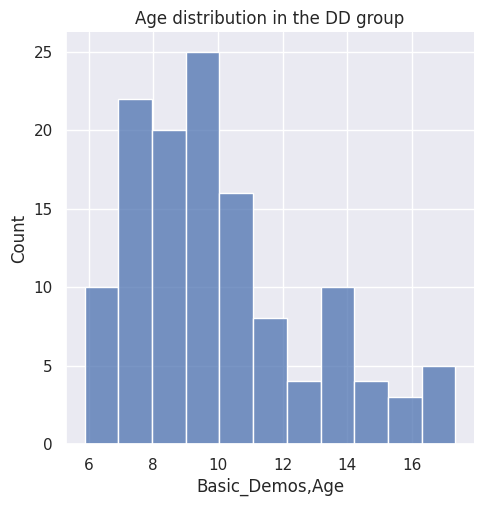

In [195]:
sns.displot(data_filtered[data_filtered['Group'] == 'DD']['Basic_Demos,Age'],
             binwidth = 1)
pl.title('Age distribution in the DD group');

In [90]:
print('Number of DD participants: ', data_filtered[data_filtered['Group'] != 'Control'].shape[0])
print('Number of DD participants younger than 8 y.o.: ', data_filtered[(data_filtered['Group'] != 'Control') & (data_filtered['Basic_Demos,Age'] < 8)].shape[0])
print('Number of DD participants older than 8 y.o.: ', data_filtered[(data_filtered['Group'] != 'Control') & (data_filtered['Basic_Demos,Age'] >= 8)].shape[0])

Number of DD participants:  522
Number of DD participants younger than 8 y.o.:  163
Number of DD participants older than 8 y.o.:  359


In [91]:
'''data_filtered.to_csv(
    Path(working_path).joinpath('data_filtered_done.csv')
)
data_filtered['Identifiers'].to_csv(
    Path(working_path).joinpath('ids.csv')
)'''

"data_filtered.to_csv(\n    Path(working_path).joinpath('data_filtered_done.csv')\n)\ndata_filtered['Identifiers'].to_csv(\n    Path(working_path).joinpath('ids.csv')\n)"